In [1]:
import numpy as np
import pandas as pd

In [2]:
X_full = pd.read_csv('train.csv', index_col='Id')
X_test_full = pd.read_csv('test.csv', index_col='Id')

In [3]:
X_full.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Remove rows with missing target, seperate target from predictors**

In [4]:
X_full.dropna(subset=['SalePrice'], axis=0, inplace=True)
y = X_full.SalePrice
X_full.drop('SalePrice', axis=1, inplace=True)

**train and test splitted**

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, test_size=0.2, random_state=7)

**categorical and numerical columns**

In [7]:
categorical_cols = [col for col in X_train_full if X_train_full[col].nunique() < 10 
                                               and X_train_full[col].dtypes == 'object']

In [8]:
numerical_cols = [col for col in X_train_full if X_train_full[col].dtypes in ['int64', 'float64']]

In [9]:
my_cols = categorical_cols + numerical_cols

X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

# Train

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

**Preprocessing for numerical data**

In [11]:
numerical_transformer = SimpleImputer(strategy='mean')

**Preprocessing for categorical data**

In [12]:
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                         ('onehot', OneHotEncoder(handle_unknown='ignore'))])

**Bundle**

In [13]:
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_cols), 
                                              ('cat', categorical_transformer, categorical_cols)])

**Find the best model**

In [14]:
train_error = []
test_error = []

for i in range(1, 150):
    model = RandomForestRegressor(n_estimators=i, random_state=7)
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    clf.fit(X_train, y_train)
    train_error.append(mean_absolute_error(clf.predict(X_train), y_train))
    test_error.append(mean_absolute_error(clf.predict(X_valid), y_valid))

In [15]:
from matplotlib import pyplot as plt

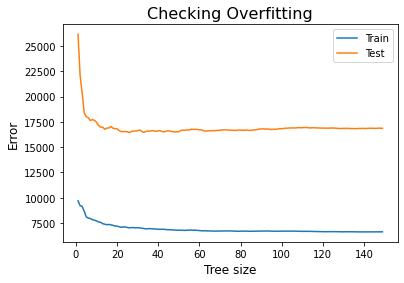

In [16]:
max_d = [i for i in range(1,150)]

plt.plot(max_d,train_error, label = 'Train')
plt.plot(max_d,test_error, label = 'Test')
plt.xlabel('Tree size',fontsize = 12)
plt.ylabel('Error',fontsize = 12)
plt.title('Checking Overfitting', fontsize = 16)
plt.legend()

In [18]:
test_error[99]

16822.586952054797

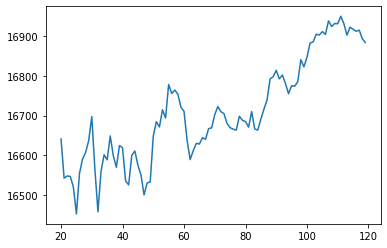

In [19]:
plt.plot([i for i in range(20, 120)],test_error[20:120])

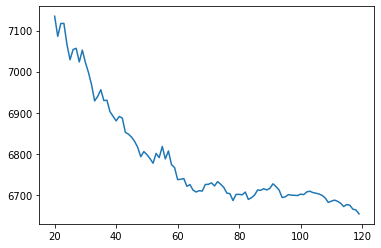

In [20]:
plt.plot([i for i in range(20, 120)],train_error[20:120])

_check 4x and 6x_

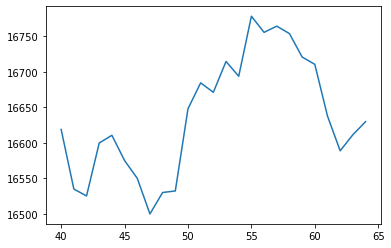

In [22]:
plt.plot([i for i in range(40, 65)],test_error[40:65])

In [23]:
print(test_error[42])
print(test_error[47])
print(test_error[62])

16525.325740681747
16500.06064497717
16588.889160687104


**i = 43, 48, 63**

### Check model and Test

In [31]:
model_1 = RandomForestRegressor(n_estimators=43, random_state=7)
clf_1 = Pipeline(steps=[('preprocessor', preprocessor), ('model', model_1)])
clf_1.fit(X_train, y_train)
preds_test_1 = clf_1.predict(X_test)

output_1 = pd.DataFrame({'Id': X_test.index, 'SalePrice': preds_test_1})

output_1.to_csv('submission_4_1.csv', index=False)

In [32]:
model_2 = RandomForestRegressor(n_estimators=48, random_state=7)
clf_2 = Pipeline(steps=[('preprocessor', preprocessor), ('model', model_2)])
clf_2.fit(X_train, y_train)
preds_test_2 = clf_2.predict(X_test)

output_2 = pd.DataFrame({'Id': X_test.index, 'SalePrice': preds_test_2})

output_2.to_csv('submission_4_2.csv', index=False)

In [33]:
model_3 = RandomForestRegressor(n_estimators=63, random_state=7)
clf_3 = Pipeline(steps=[('preprocessor', preprocessor), ('model', model_3)])
clf_3.fit(X_train, y_train)
preds_test_3 = clf_3.predict(X_test)

output_3 = pd.DataFrame({'Id': X_test.index, 'SalePrice': preds_test_3})

output_3.to_csv('submission_4_3.csv', index=False)

## Improve

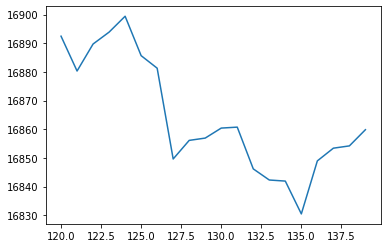

In [39]:
plt.plot([i for i in range(120, 140)],test_error[120:140])

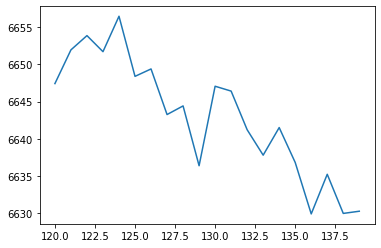

In [40]:
plt.plot([i for i in range(120, 140)],train_error[120:140])

**i = 128, 136**

In [41]:
model_4 = RandomForestRegressor(n_estimators=128, random_state=7)
clf_4 = Pipeline(steps=[('preprocessor', preprocessor), ('model', model_4)])
clf_4.fit(X_train, y_train)
preds_test_4 = clf_4.predict(X_test)

output_4 = pd.DataFrame({'Id': X_test.index, 'SalePrice': preds_test_4})

output_4.to_csv('submission_4_4.csv', index=False)

In [42]:
model_5 = RandomForestRegressor(n_estimators=136, random_state=7)
clf_5 = Pipeline(steps=[('preprocessor', preprocessor), ('model', model_5)])
clf_5.fit(X_train, y_train)
preds_test_5 = clf_5.predict(X_test)

output_5 = pd.DataFrame({'Id': X_test.index, 'SalePrice': preds_test_5})

output_5.to_csv('submission_4_5.csv', index=False)

In [48]:
model_6 = RandomForestRegressor(n_estimators=200, random_state=7)
clf_6 = Pipeline(steps=[('preprocessor', preprocessor), ('model', model_6)])
clf_6.fit(X_train, y_train)
preds_test_6 = clf_6.predict(X_test)

output_6 = pd.DataFrame({'Id': X_test.index, 'SalePrice': preds_test_6})

output_6.to_csv('submission_4_6.csv', index=False)